# Lecture 5.1: More About Exploratory Data Analysis 

<div style="border: 1px double black; padding: 10px; margin: 10px">

**Goals for today's lecture:**
* Continue on our Baseball Players Case Studies
* the **covariation** between two variables:
    
This lecture note corresponds to parts of Chapter 7 of your book.
</div>


In [2]:
library(tidyverse)
library(nycflights13)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.3     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   2.0.1     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



## Case Studies 

### Who is the greatest batter of all time?
The `Lahman` dataset contains information on baseball players.



In [3]:
# install.packages("Lahman")
library(Lahman)
bat <- as_tibble(Batting) %>% print

# A tibble: 108,789 × 22
   playerID  yearID stint teamID lgID      G    AB     R     H   X2B   X3B    HR
   <chr>      <int> <int> <fct>  <fct> <int> <int> <int> <int> <int> <int> <int>
 1 abercda01   1871     1 TRO    NA        1     4     0     0     0     0     0
 2 addybo01    1871     1 RC1    NA       25   118    30    32     6     0     0
 3 allisar01   1871     1 CL1    NA       29   137    28    40     4     5     0
 4 allisdo01   1871     1 WS3    NA       27   133    28    44    10     2     2
 5 ansonca01   1871     1 RC1    NA       25   120    29    39    11     3     0
 6 armstbo01   1871     1 FW1    NA       12    49     9    11     2     1     0
 7 barkeal01   1871     1 RC1    NA        1     4     0     1     0     0     0
 8 barnero01   1871     1 BS1    NA       31   157    66    63    10     9     0
 9 barrebi01   1871     1 FW1    NA        1     5     1     1     1     0     0
10 barrofr01   1871     1 BS1    NA       18    86    13    13     2     1     0
# …

### Exercise
Output all the years in which the batting average for those years for cobbty01 is less than his bat_avg across all years. That is, we are interested in knowing which year cobbty01 underperform.    

In [4]:
bat %>% filter(playerID=="cobbty01") %>% 
mutate(bat_avg = sum(H, na.rm = T) / sum(AB, na.rm = T), bat_avg_year = H/AB) %>%
filter(bat_avg_year < bat_avg) %>% print

# A tibble: 10 × 24
   playerID yearID stint teamID lgID      G    AB     R     H   X2B   X3B    HR
   <chr>     <int> <int> <fct>  <fct> <int> <int> <int> <int> <int> <int> <int>
 1 cobbty01   1905     1 DET    AL       41   151    19    36     6     0     1
 2 cobbty01   1906     1 DET    AL       98   358    45   113    15     5     1
 3 cobbty01   1907     1 DET    AL      150   605    99   212    28    14     5
 4 cobbty01   1908     1 DET    AL      150   580    88   188    36    20     4
 5 cobbty01   1920     1 DET    AL      112   428    86   143    28     8     2
 6 cobbty01   1923     1 DET    AL      145   556   103   189    40     7     6
 7 cobbty01   1924     1 DET    AL      155   625   115   211    38    10     4
 8 cobbty01   1926     1 DET    AL       79   233    48    79    18     5     4
 9 cobbty01   1927     1 PHA    AL      134   490   104   175    32     7     5
10 cobbty01   1928     1 PHA    AL       95   353    54   114    27     4     1
# … with 12 more var

## Exercise
Now output all rows for each player that underperform, that is, their bat_avg_year is less than bat_avg.

That is, we are interested in knowing whether there is any specific year that the players underperform. 

In [5]:
group_by(bat,playerID) %>% filter(AB !=0 && H !=0) %>%
mutate(bat_avg = sum(H, na.rm = T) / sum(AB, na.rm = T), bat_avg_year = H/AB) %>% arrange(playerID) %>%
filter(bat_avg_year < bat_avg) %>% print

# A tibble: 37,557 × 24
# Groups:   playerID [9,468]
   playerID  yearID stint teamID lgID      G    AB     R     H   X2B   X3B    HR
   <chr>      <int> <int> <fct>  <fct> <int> <int> <int> <int> <int> <int> <int>
 1 aaronha01   1954     1 ML1    NL      122   468    58   131    27     6    13
 2 aaronha01   1960     1 ML1    NL      153   590   102   172    20    11    40
 3 aaronha01   1966     1 ATL    NL      158   603   117   168    23     1    44
 4 aaronha01   1968     1 ATL    NL      160   606    84   174    33     4    29
 5 aaronha01   1969     1 ATL    NL      147   547   100   164    30     3    44
 6 aaronha01   1970     1 ATL    NL      150   516   103   154    26     1    38
 7 aaronha01   1972     1 ATL    NL      129   449    75   119    10     0    34
 8 aaronha01   1973     1 ATL    NL      120   392    84   118    12     1    40
 9 aaronha01   1974     1 ATL    NL      112   340    47    91    16     0    20
10 aaronha01   1975     1 ML4    AL      137   465    45

## Exercise
Write code to find the player with the highest bat_avg for each team. You may find the function `slice_max` useful.

In [6]:
group_by(bat,teamID,playerID) %>% filter(AB !=0 && H !=0) %>% mutate(total_AB = sum(AB,na.rm = T)) %>% 
filter(total_AB > 100) %>% summarize(bat_avg = sum(H, na.rm = T) / sum(AB, na.rm = T)) %>% 
arrange(teamID,desc(bat_avg),playerID) %>% slice_max(1) %>% print()

`summarise()` has grouped output by 'teamID'. You can override using the `.groups` argument.



# A tibble: 140 × 3
# Groups:   teamID [140]
   teamID playerID  bat_avg
   <fct>  <chr>       <dbl>
 1 ALT    smithge01   0.315
 2 ANA    guerrvl01   0.337
 3 ARI    segurje01   0.319
 4 ATL    ozunama01   0.338
 5 BAL    iglesjo01   0.373
 6 BFN    broutda01   0.351
 7 BFP    hoydu01     0.298
 8 BL1    forceda01   0.384
 9 BL2    rayir01     0.340
10 BL3    vanhage01   0.318
# … with 130 more rows


## Names of baseball players

Let us think more about names. Naming frequencies change a lot over time. There are 19617 baseball players in this data set. How have their names changed over time?

We are going to extract the first name and last name in our data set `Lahman::Master` by linking the playerID.

In [7]:
players <- as_tibble(Lahman::Master) %>% 
    select(nameFirst, nameLast, nameGiven) %>% print

# A tibble: 20,093 × 3
   nameFirst nameLast    nameGiven       
   <chr>     <chr>       <chr>           
 1 David     Aardsma     David Allan     
 2 Hank      Aaron       Henry Louis     
 3 Tommie    Aaron       Tommie Lee      
 4 Don       Aase        Donald William  
 5 Andy      Abad        Fausto Andres   
 6 Fernando  Abad        Fernando Antonio
 7 John      Abadie      John W.         
 8 Ed        Abbaticchio Edward James    
 9 Bert      Abbey       Bert Wood       
10 Charlie   Abbey       Charles S.      
# … with 20,083 more rows


## Exercise
What were the top five most common first names for players born before 1900? After 1980?

In [8]:
## Solution
filter(Master, birthYear < 1900) %>% as_tibble %>% count(nameFirst) %>%arrange(desc(n)) %>% slice(1:5)

filter(Master, birthYear >1980) %>% as_tibble %>% count(nameFirst) %>%arrange(desc(n)) %>% slice(1:5)




nameFirst,n
<chr>,<int>
Bill,289
John,218
George,186
Ed,159
Charlie,157


nameFirst,n
<chr>,<int>
Matt,68
Chris,63
Ryan,60
Josh,56
Jose,53


One thing we notice is that there are a lot of nicknames. It might make more sense to look at the "given name", which is usually the first and middle names. To do this, we will need to split up these names. There is a built-in command for doing this in R:

In [9]:
players_given <- separate(players, nameGiven, into = c("givenFirst", "rest")) %>% print

Warning message:
“Expected 2 pieces. Additional pieces discarded in 1268 rows [7, 10, 39, 84, 136, 148, 163, 193, 219, 252, 259, 263, 276, 300, 305, 307, 331, 333, 352, 430, ...].”
Warning message:
“Expected 2 pieces. Missing pieces filled with `NA` in 1750 rows [44, 52, 54, 76, 126, 131, 151, 152, 154, 168, 170, 171, 172, 173, 174, 184, 185, 191, 192, 199, ...].”


# A tibble: 20,093 × 4
   nameFirst nameLast    givenFirst rest   
   <chr>     <chr>       <chr>      <chr>  
 1 David     Aardsma     David      Allan  
 2 Hank      Aaron       Henry      Louis  
 3 Tommie    Aaron       Tommie     Lee    
 4 Don       Aase        Donald     William
 5 Andy      Abad        Fausto     Andres 
 6 Fernando  Abad        Fernando   Antonio
 7 John      Abadie      John       W      
 8 Ed        Abbaticchio Edward     James  
 9 Bert      Abbey       Bert       Wood   
10 Charlie   Abbey       Charles    S      
# … with 20,083 more rows


## Exercise
What were the top five most common first names for players born before 1900? After 1980?

In [10]:
filter(Master, birthYear < 1900) %>% as_tibble %>% separate(nameGiven, into = c("givenFirst", "rest")) %>% 
count(givenFirst) %>%arrange(desc(n))  %>% slice(1:10)

filter(Master, birthYear < 1900) %>% as_tibble %>% count(nameFirst) %>%arrange(desc(n)) %>% slice(1:10)

Warning message:
“Expected 2 pieces. Additional pieces discarded in 782 rows [1, 4, 18, 31, 59, 62, 70, 73, 93, 102, 106, 113, 124, 126, 128, 143, 153, 162, 167, 171, ...].”
Warning message:
“Expected 2 pieces. Missing pieces filled with `NA` in 434 rows [12, 40, 45, 48, 58, 67, 71, 90, 103, 108, 138, 146, 147, 149, 157, 160, 193, 198, 199, 214, ...].”


givenFirst,n
<chr>,<int>
John,499
William,478
Charles,272
James,261
George,254
Edward,165
Thomas,158
Joseph,154
Frank,136


nameFirst,n
<chr>,<int>
Bill,289
John,218
George,186
Ed,159
Charlie,157
Frank,157
Jack,151
Joe,149
Harry,134


## Finding distinct values

Here's an example: I want to know how many distinct values are there? The `n_distinct()` function takes a vector of values, and returns the number of distinct values:

In [11]:
n_distinct(c("Michigan", "Ohio", "STATS 306", "Michigan"))

[1] 3

## Exercise
How many distinct names were there among players born before 1900? After 1980?

In [12]:
## Solution
Master %>% filter(birthYear < 1910) %>% select(nameFirst) %>% n_distinct()

[1] 1080

Are there more or less unique names now than there were in the past? Let's consider the number of distinct names seen in each year:

Adding missing grouping variables: `birthYear`

Warning message:
“Removed 1 rows containing missing values (geom_point).”


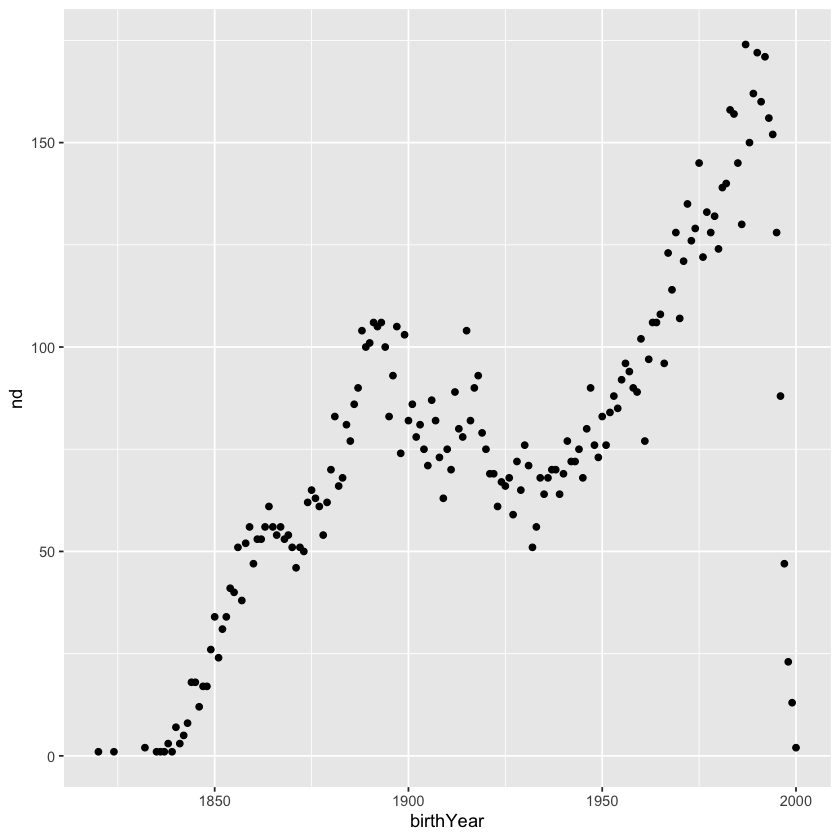

In [13]:
Master %>% group_by(birthYear) %>% select(nameFirst) %>%
summarize(nd = n_distinct(nameFirst))  %>% ggplot() + geom_point(aes(x = birthYear, y=nd))



# Covariation Between Two Variables

### A Categorical and A Continuous Variable

In [19]:
print(mpg)

# A tibble: 234 x 11
   manufacturer model    displ  year   cyl trans   drv     cty   hwy fl    class
   <chr>        <chr>    <dbl> <int> <int> <chr>   <chr> <int> <int> <chr> <chr>
 1 audi         a4         1.8  1999     4 auto(l… f        18    29 p     comp…
 2 audi         a4         1.8  1999     4 manual… f        21    29 p     comp…
 3 audi         a4         2    2008     4 manual… f        20    31 p     comp…
 4 audi         a4         2    2008     4 auto(a… f        21    30 p     comp…
 5 audi         a4         2.8  1999     6 auto(l… f        16    26 p     comp…
 6 audi         a4         2.8  1999     6 manual… f        18    26 p     comp…
 7 audi         a4         3.1  2008     6 auto(a… f        18    27 p     comp…
 8 audi         a4 quat…   1.8  1999     4 manual… 4        18    26 p     comp…
 9 audi         a4 quat…   1.8  1999     4 auto(l… 4        16    25 p     comp…
10 audi         a4 quat…   2    2008     4 manual… 4        20    28 p     comp…
# … wit

We can map a categorical variable to, say, the **color** aesthetic in a frequency polygon of a continuous variable.

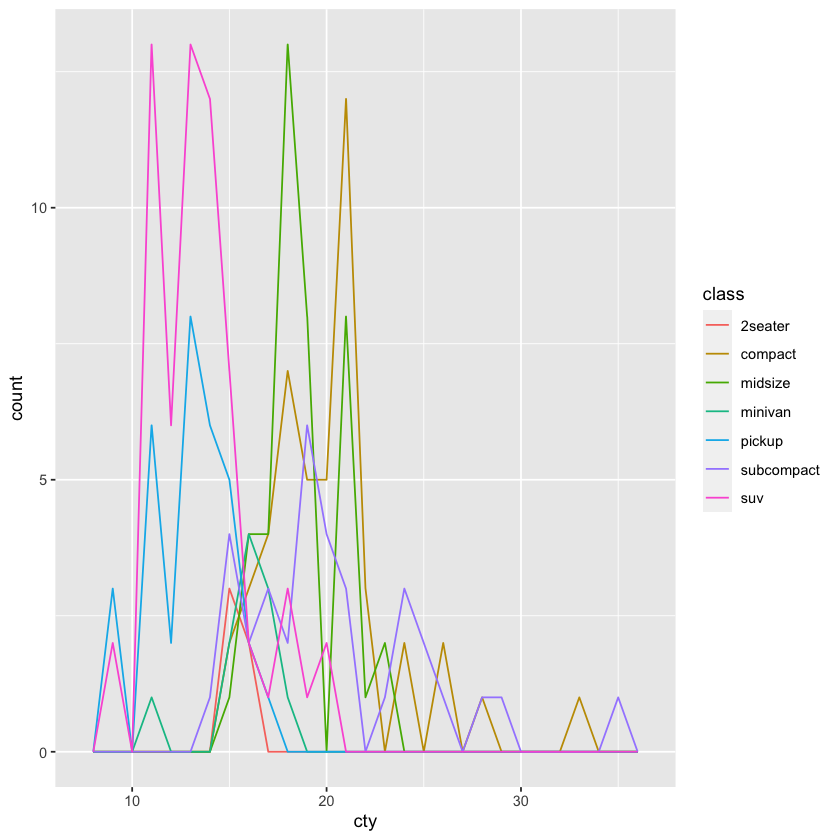

In [20]:
ggplot(data = mpg) +
    geom_freqpoly(mapping = aes(x = cty, color = class), binwidth = 1)

Mapping the `color` aesthetic to the `class` variable in a histogram does not have a good effect.

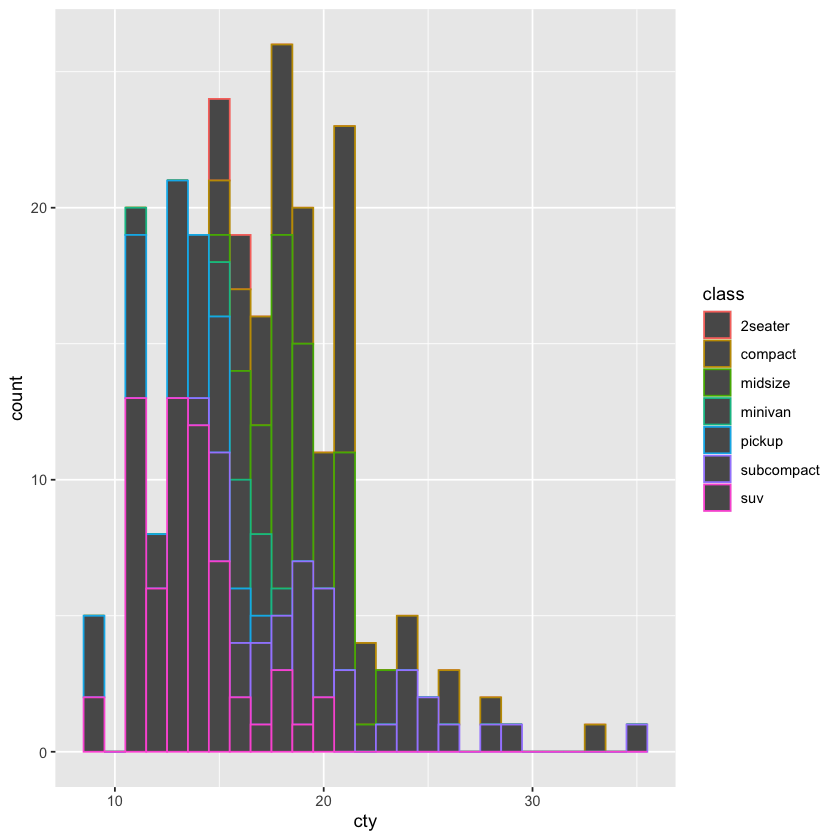

In [21]:
ggplot(data = mpg) + 
    geom_histogram(mapping = aes(x = cty, color = class), binwidth = 1)

Changing the **fill** aesthetic to the **color** aesthetic improves the appearance but the plot remains problematic.

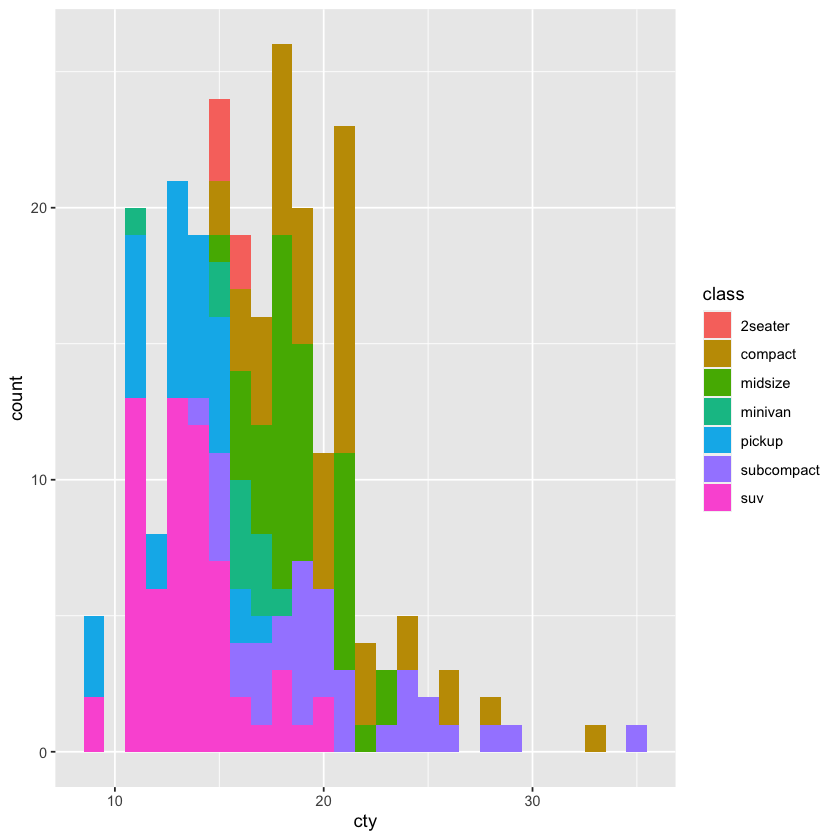

In [22]:
ggplot(data = mpg) + 
    geom_histogram(mapping = aes(x = cty, fill = class), binwidth = 1)

Another thing we can do with a categorical, continuous pair is to use a **boxplot**.

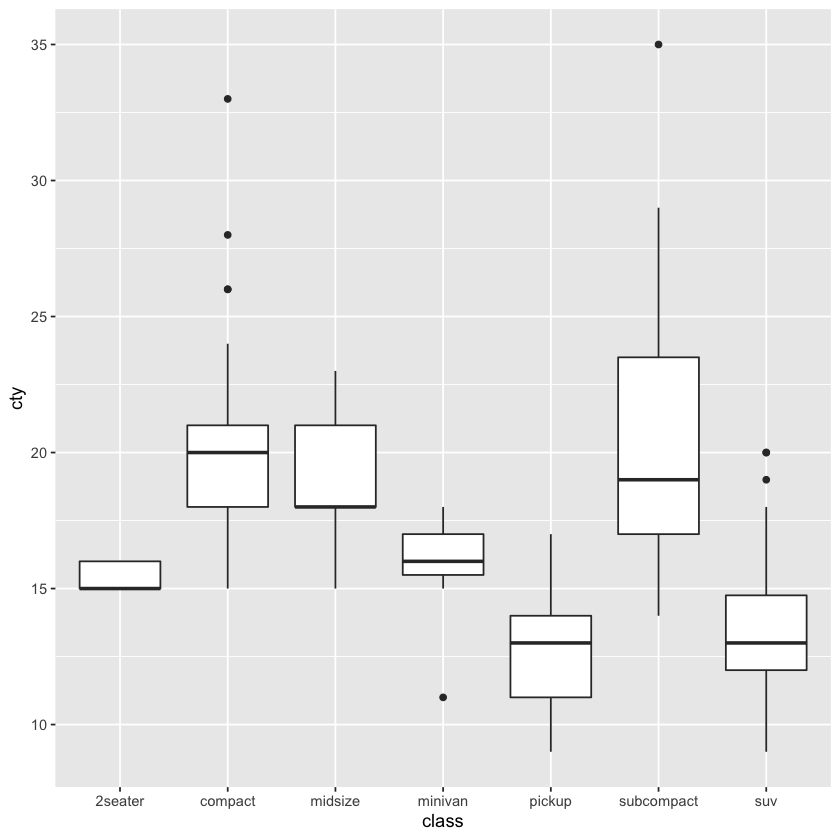

In [24]:
ggplot(data = mpg) + 
    geom_boxplot(mapping = aes(x = class, y = cty))

* The lower and upper hinges correspond to the first and third quartiles (the 25th and 75th percentiles).
* The upper whisker extends from the hinge to the largest value no further than 1.5 * IQR from the hinge (where IQR is the inter-quartile range, or distance between the first and third quartiles).
* The lower whisker extends from the hinge to the smallest value at most 1.5 * IQR of the hinge.
* Data beyond the end of the whiskers are called "outlying" points and are plotted individually.

To replot with `class` values listed in order of the median value for `cty`, we can use the `reorder()` function.

```
reorder(cat, con, FUN = median)
```

reorders the levels of the categorical variable `cat` according the continuous variable `con`. The function `median()` is applied the the `con` values corresponding to a fixed level of `cat`. Default value of the `FUN` argument is `mean`.

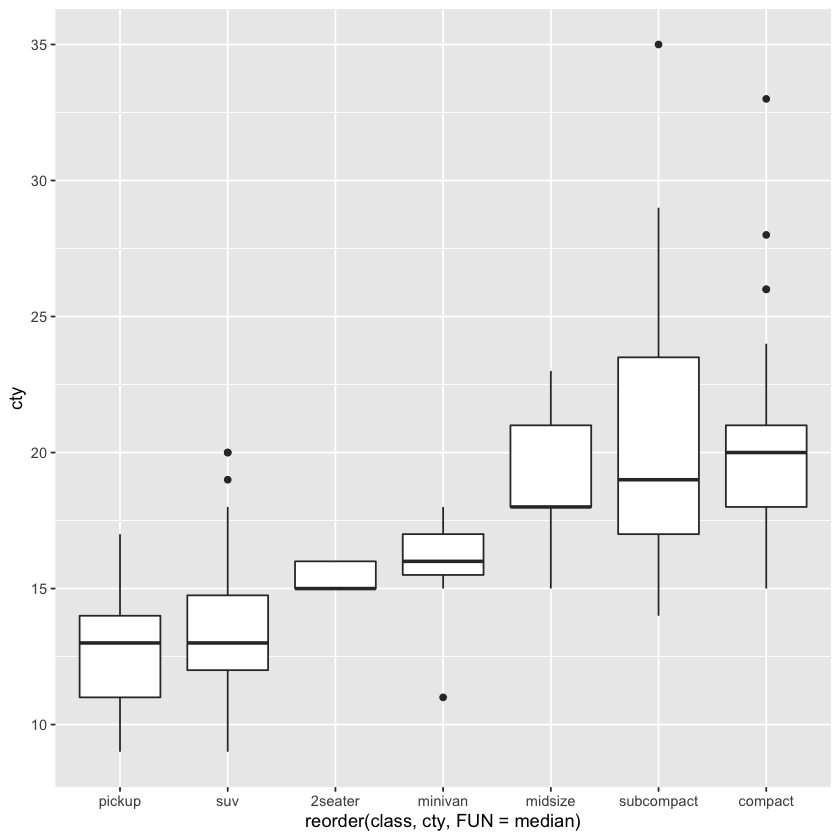

In [25]:
ggplot(data = mpg) +
    geom_boxplot(mapping = aes(x = reorder(class, cty, FUN = median), y = cty))

We can flip the x, y axes if the categorical level names are long

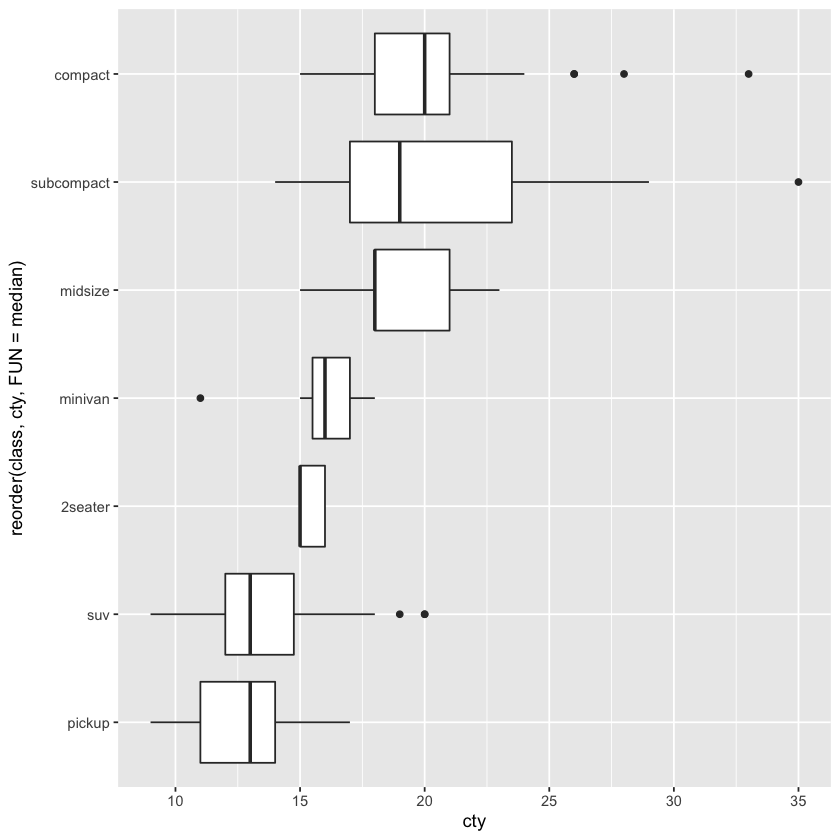

In [26]:
ggplot(data = mpg) + 
    geom_boxplot(mapping = aes(x = reorder(class, cty, FUN = median), y = cty)) +
    coord_flip()

Contrast this with faceting the `cty` histogram on the `class` variable.

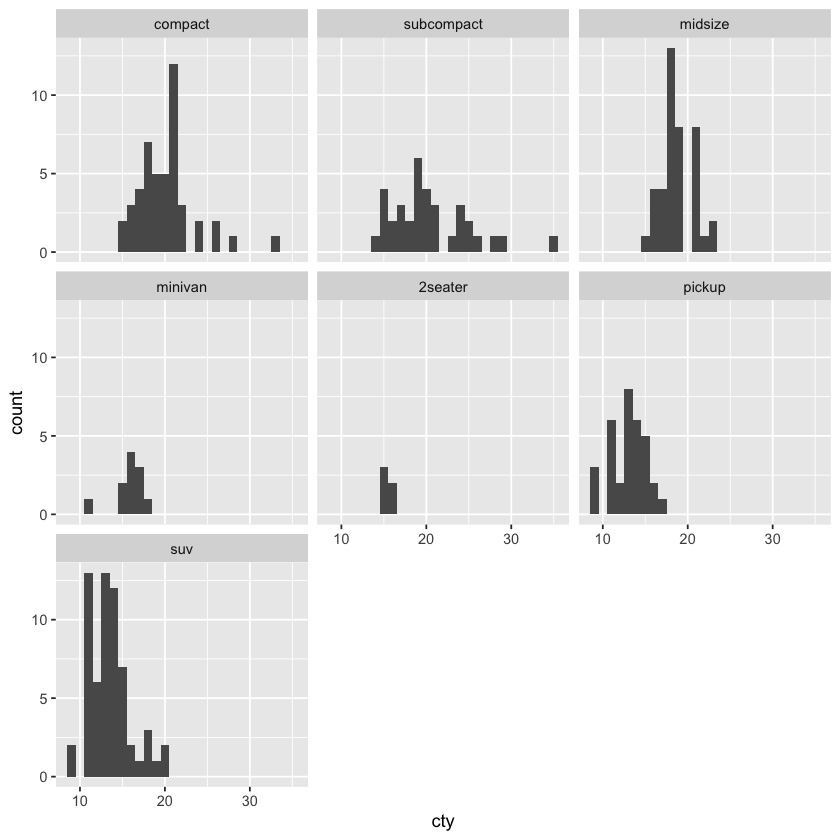

In [27]:
ggplot(data = mpg) + 
    geom_histogram(mapping = aes(x = cty), binwidth = 1) +
    facet_wrap(~ reorder(class, desc(cty), FUN = median))

We can also superimpose the points themselves on top of the boxplot by adding `geom_jitter`. But it is a good idea to hide the outliers by setting `outlier.shape = NA` first.

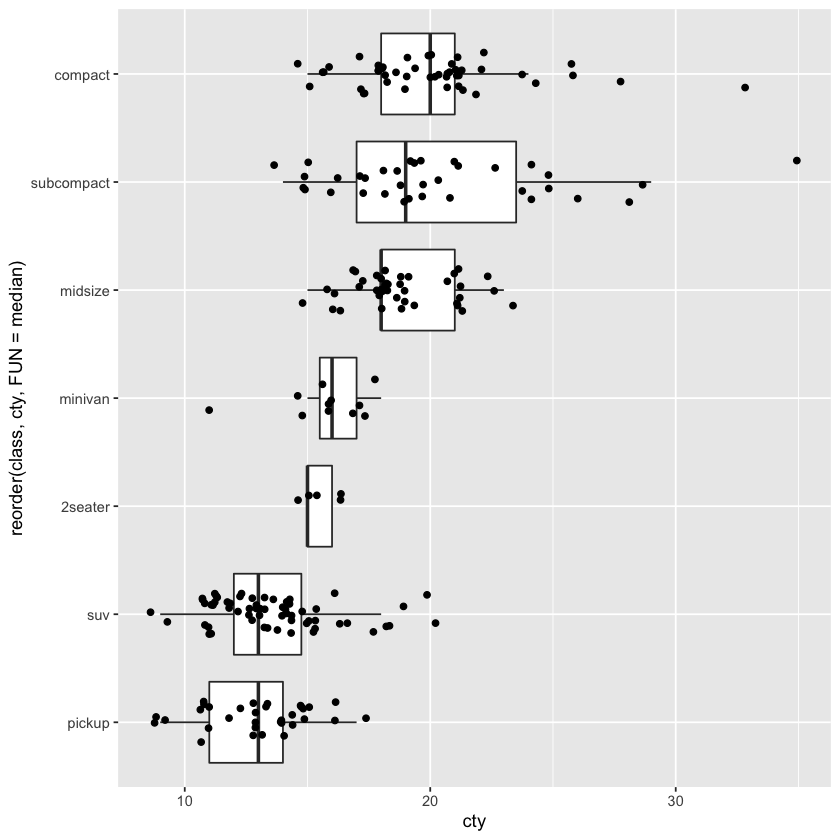

In [28]:
ggplot(data = mpg, mapping = aes(x = reorder(class, cty, FUN = median), y = cty)) + 
    geom_boxplot(outlier.shape = NA) +
    geom_jitter(width = .2) +
    coord_flip()

# Two categorical variables

`geom_count` can be used to visualize two categorical variables.`geom_count` can be used to visualize two categorical variables.

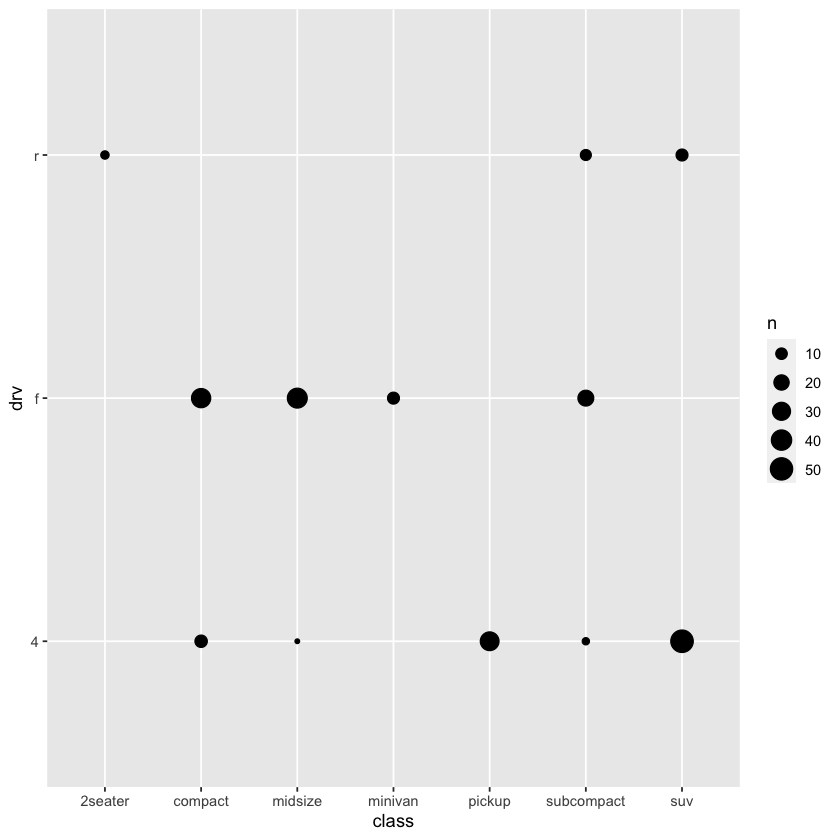

In [29]:
ggplot(data = mpg) +
    geom_count(mapping = aes(x = class, y = drv))

We can compute these numbers using `count()`.

In [30]:
mpg %>%
    count(class, drv)

class,drv,n
<chr>,<chr>,<int>
2seater,r,5
compact,4,12
compact,f,35
midsize,4,3
midsize,f,38
minivan,f,11
pickup,4,33
subcompact,4,4
subcompact,f,22


These counts can be fed to other geometries.

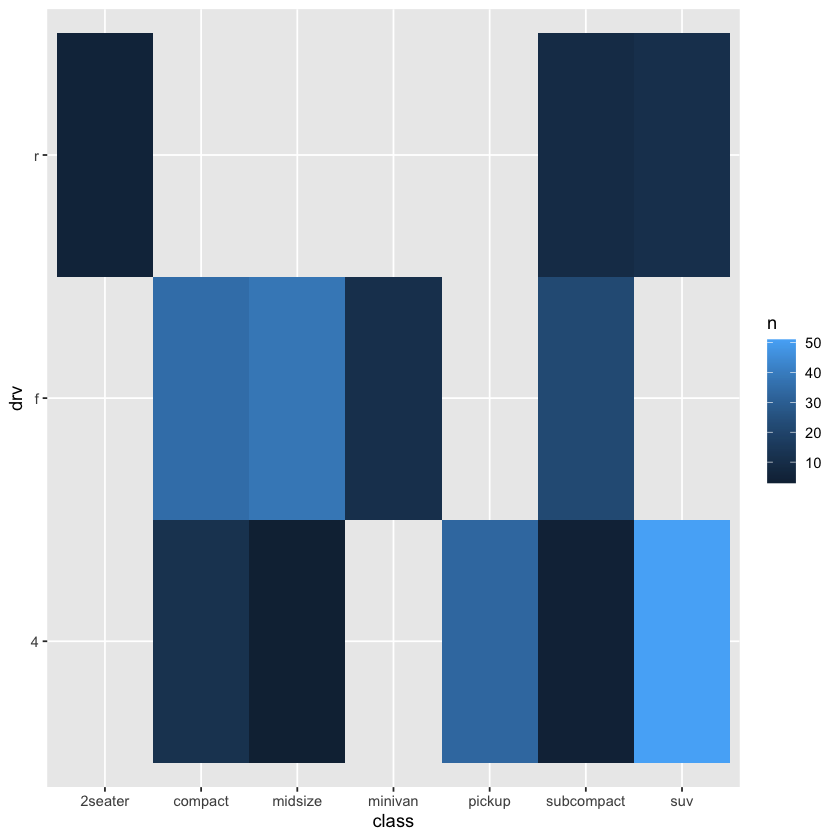

In [31]:
mpg %>%
    count(class, drv) %>%
    ggplot() +
        geom_tile(mapping = aes(x = class, y = drv, fill = n))

# Two continuous variables

We already know a lot about scatterplots. Once you have too many points, you may want to use `geom_bin2d` or `geom_hex`.We already know a lot about scatterplots. Once you have too many points, you may want to use `geom_bin2d` or `geom_hex`.

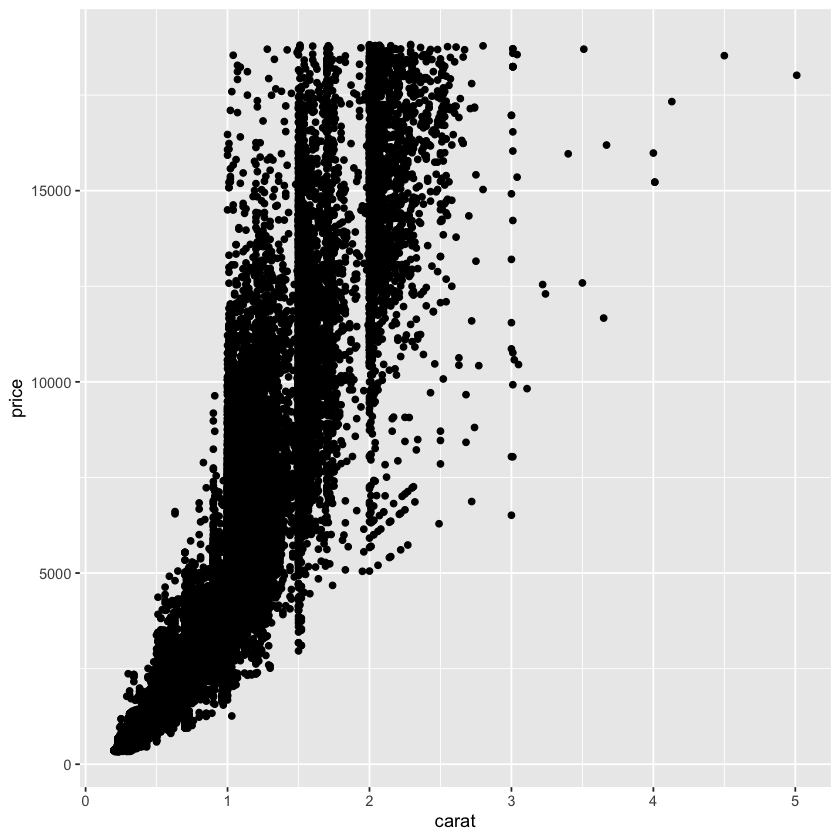

In [2]:
ggplot(data = diamonds) +
    geom_point(mapping = aes(x = carat, y = price))

Sometimes setting the transparency of points using `alpha` can help.

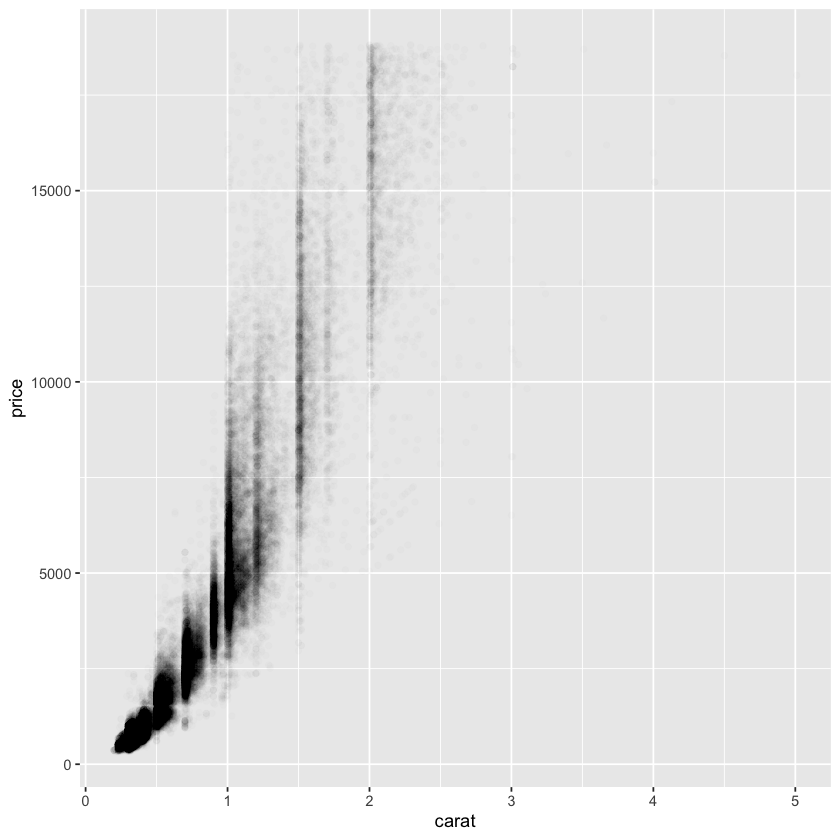

In [3]:
ggplot(data = diamonds) +
    geom_point(mapping = aes(x = carat, y = price), alpha = 0.01)

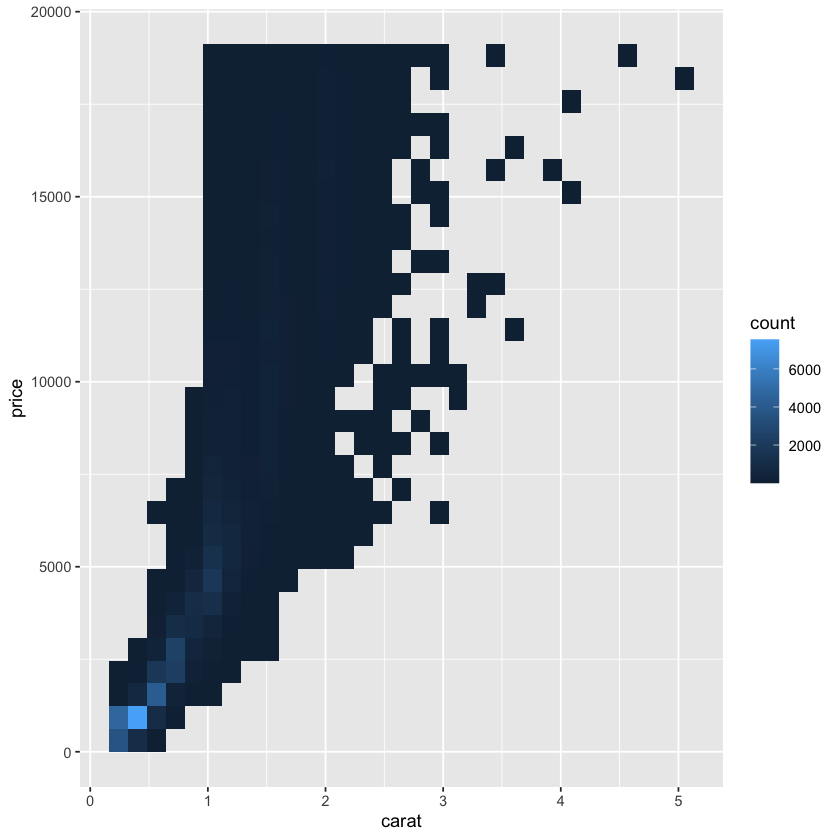

In [4]:
ggplot(data = diamonds) +
    geom_bin2d(mapping = aes(x = carat, y = price))

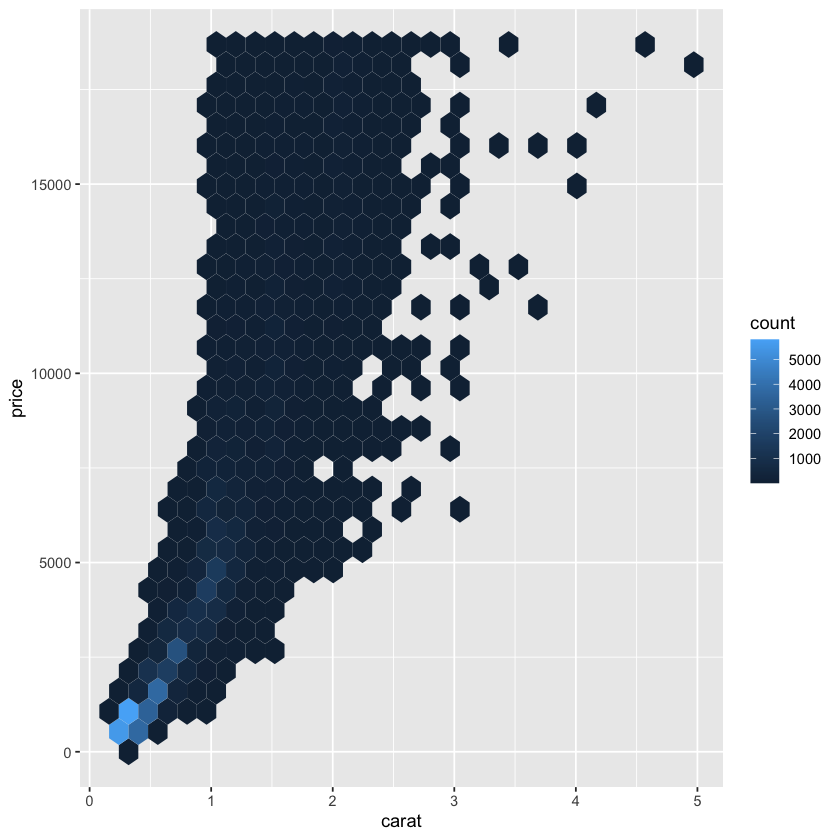

In [5]:
ggplot(data = diamonds) +
    geom_hex(mapping = aes(x = carat, y = price))

Let us try to see what happens if we use a boxplot with 2 continuous variables: `price` as a function of `carat` for the `diamonds` tibble.

Warning message:
“Continuous x aesthetic -- did you forget aes(group=...)?”


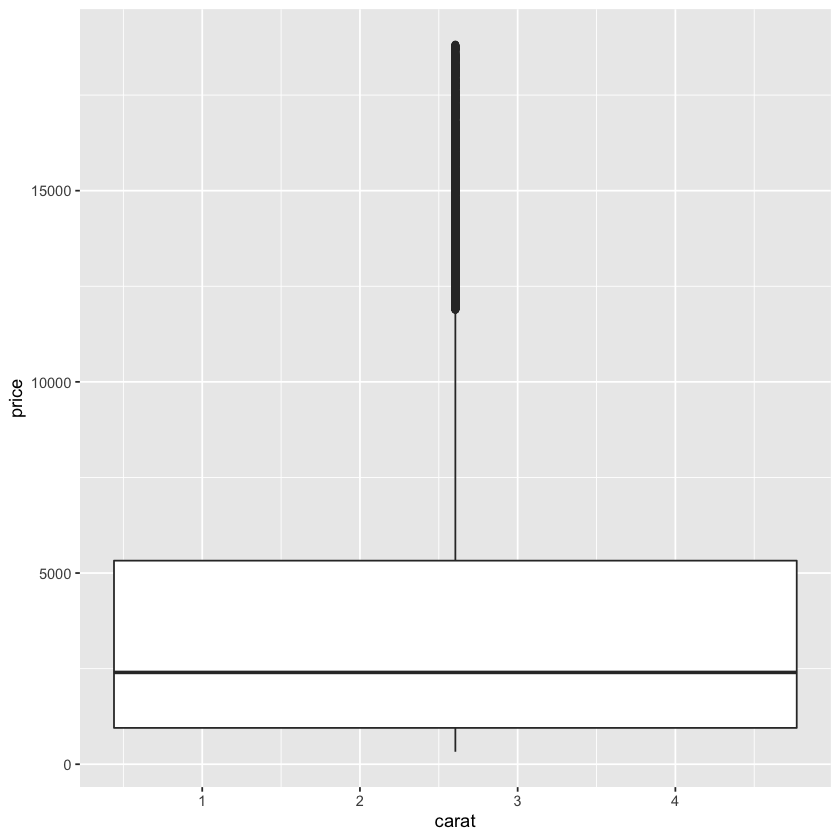

In [38]:
ggplot(data = diamonds) +
    geom_boxplot(mapping = aes(x = carat, y = price))

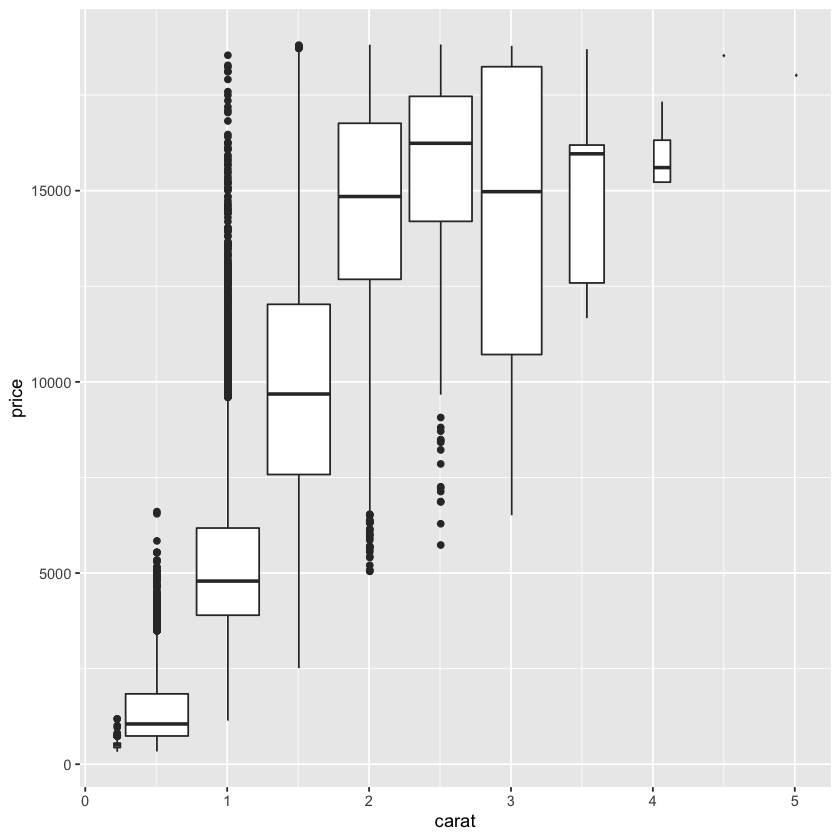

In [39]:
ggplot(data = diamonds) +
    geom_boxplot(mapping = aes(x = carat, y = price, group = cut_width(carat, 0.5)))

If outliers run into each other, you could adjust `outlier.alpha`.

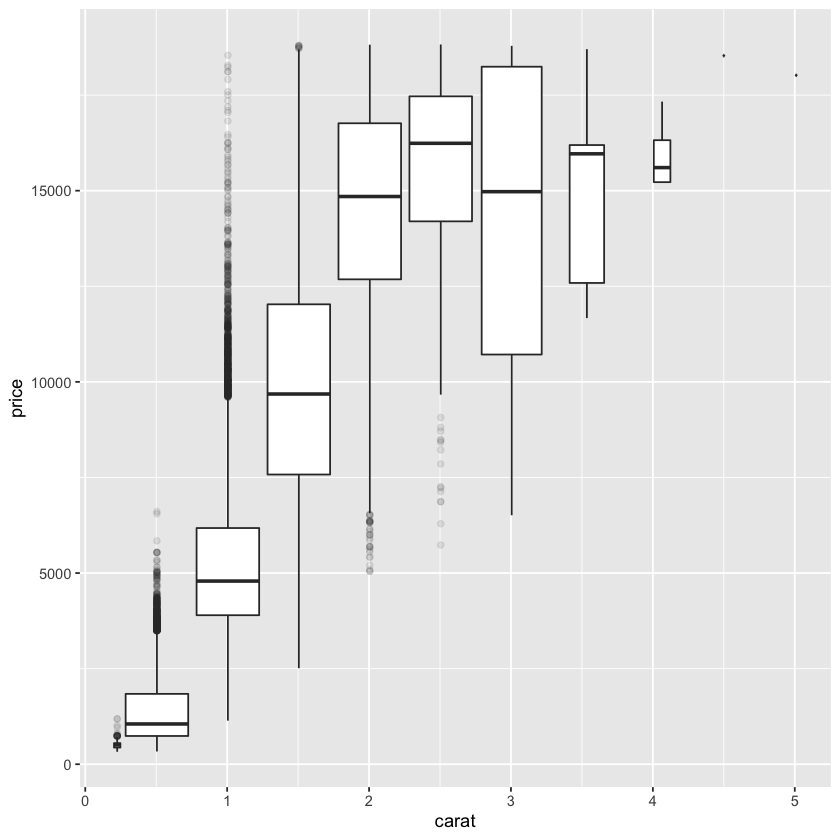

In [40]:
ggplot(data = diamonds) +
    geom_boxplot(mapping = aes(x = carat, y = price, group = cut_width(carat, 0.5)), outlier.alpha = 0.1)